### ARIMA Forecasting on Rye Production till 2025, and Honey Production Prediction for 2023


In [37]:
# Load Libraries

import pandas as pd
import numpy as np
import pmdarima as pm
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
import matplotlib.pyplot as plt
from matplotlib import pyplot
from math import sqrt
from numpy import split
from numpy import array
import statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sympy.solvers import solve
from sympy import Symbol
from pandas import DataFrame
from scipy.stats import boxcox
from pandas.plotting import autocorrelation_plot

In [38]:
# Importing dataframe

Rye_Prod = pd.read_csv('../Data/RyeArima.csv')

Rye_Prod

,Year,RyeProd
0,1998,8758000
1,1999,8596000
2,2000,8691000
3,2001,8929000
4,2002,9056000
5,2003,11001000
6,2004,9392000
7,2005,496684000
8,2006,3797778000
9,2007,4408118000


In [39]:
# Formatting Year to date datatype 

Rye_Prod['Year'] = pd.to_datetime(Rye_Prod['Year'], format='%Y')
Rye_Prod

,Year,RyeProd
0,1998-01-01,8758000
1,1999-01-01,8596000
2,2000-01-01,8691000
3,2001-01-01,8929000
4,2002-01-01,9056000
5,2003-01-01,11001000
6,2004-01-01,9392000
7,2005-01-01,496684000
8,2006-01-01,3797778000
9,2007-01-01,4408118000


In [40]:
## Setting Year as index

Rye_Prod.set_index('Year', inplace=True)


In [41]:
# Power Transforms

# Box-Cox Transform

# It can be thought of as a power tool to iron out power-based change in your time series. 
# The resulting series may be more linear and the resulting distribution more Gaussian or Uniform, 
# depending on the underlying process that generated it. The scipy.stats library provides an implementation 
# of the Box-Cox transform. The boxcox() function3 takes an argument, called lambda, 
# that controls the type of transform to perform.
# Below are some common values for lambda:
# 􏰀 lambda = -1. is a reciprocal transform.
# 􏰀 lambda = -0.5 is a reciprocal square root transform.
# 􏰀 lambda = 0.0 is a log transform.
# 􏰀 lambda = 0.5 is a square root transform.
# 􏰀 lambda = 1.0 is no transform.

#  We can set the lambda parameter to None (the default) and let the function find a statistically tuned value.
# The following example demonstrates this usage, returning both the transformed dataset and the 
# chosen lambda value.

In [42]:
# Box Cox for Rye

X = Rye_Prod.values

dataframeB = DataFrame(X)
dataframeB.columns = ['RyeProd']
dataframeB['RyeProd'], lam = boxcox(dataframeB['RyeProd'])
print('Lambda: %f' % lam)

Lambda: 0.176578


In [43]:
# Running the example discovers the lambda value of .17. 
# We can see that this is very close to a lambda value of 0; So we need log transform ideally.

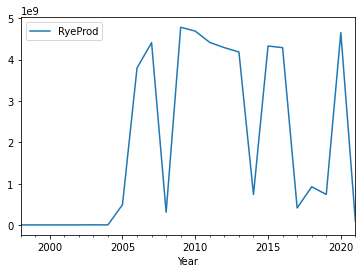

In [44]:
# Line Plot

Rye_Prod.plot()
pyplot.show()

In [45]:
# Stationary Time Series and Forecasting

# If we fit a stationary model to data, we assume our data are a realization of a stationary process. 
# So our first step in an analysis should be to check whether there is any evidence of a trend or seasonal 
# effects and, if there is, remove them.

# The null hypothesis of the ADF test is that the time series is non-stationary. 
# So, if the p-value of the test is less than the significance level (0.05) then you reject 
# the null hypothesis and infer that the time series is indeed stationary.

# Augmented Dickey-Fuller test Rye

X = Rye_Prod.values

### ---- 
result = adfuller(X)

dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': -3.255683722779796,
 'pvalue': 0.01697942300897568,
 'usedlag': 9,
 'nobs': 14,
 'criticalvalues': {'1%': -4.01203360058309,
  '5%': -3.1041838775510207,
  '10%': -2.6909873469387753},
 'icbest': 620.1809492433262}

In [46]:
# As part of the output, we get a look-up table to help determine the ADF statistic. 
# We can see that our statistic value of -3.25 is larger than the 1% critical valueand smaller than others.
# Meaning that we can say we fail to accept the null hypothesis and in turn that the time series is stationary.

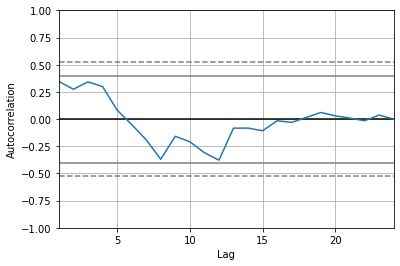

In [47]:
# create an autocorrelation plot Rye

autocorrelation_plot(X)
pyplot.show()

In [48]:
# Model Evaluation
# Train-Test Split

# Depending on the amount of data we have available and the amount of data required, 
# we can use splits of 50-50, 70-30 and 90-10. It is straightforward to split data in Python.

In [49]:
# Train-Test Split for Rye, 85-15(24 - 4 years)

train = Rye_Prod[:20]
test = Rye_Prod[-4:]


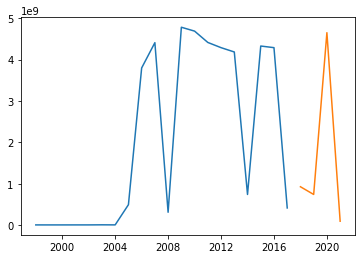

In [50]:
# Plot the Training and Testing data

pyplot.plot(train) + pyplot.plot(test)

In [51]:
# Get p,d,q values 

modelRye = pm.auto_arima(Rye_Prod['RyeProd'], seasonal = False)

modelRye

ARIMA(order=(3, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [52]:
# 3,0,0 ARIMA Model

model1 = ARIMA(Rye_Prod['RyeProd'], order=(3,0,0))

model_fit = model1.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                RyeProd   No. Observations:                   24
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -545.782
Date:                Tue, 19 Jul 2022   AIC                           1101.564
Time:                        22:14:01   BIC                           1107.454
Sample:                    01-01-1998   HQIC                          1103.126
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.985e+09   1.52e-11    1.3e+20      0.000    1.98e+09    1.98e+09
ar.L1          0.2549      0.216      1.182      0.237      -0.168       0.678
ar.L2          0.0714      0.253      0.282      0.7

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [53]:
# the pvalue is greater than .05 for all three ar.L1, ar.L2 and ar.L3. So let's try we can try 0,1,1 fit model.

In [54]:
# 0,1,1 ARIMA Model

model1 = ARIMA(Rye_Prod['RyeProd'], order=(0,1,1))

model_fit = model1.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                RyeProd   No. Observations:                   24
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -524.576
Date:                Tue, 19 Jul 2022   AIC                           1053.151
Time:                        22:14:03   BIC                           1055.422
Sample:                    01-01-1998   HQIC                          1053.722
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6217      0.183     -3.393      0.001      -0.981      -0.263
sigma2      4.253e+18   4.68e-21   9.09e+38      0.000    4.25e+18    4.25e+18
Ljung-Box (L1) (Q):                   0.22   Jarque-

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [55]:
# p-value <.05 for L1 so let's go with thi model.

In [56]:
# Manually Build Auto ARIMA model 

# 0,1,1 ARIMA Model


Arima_Model =  auto_arima(train,start_p=1, d=1, start_q=1, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q = 1, max_P=5, max_D=5,
                          max_Q=5, m = 12, seasonal = False, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=873.543, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=874.522, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=873.731, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=871.992, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=872.549, Time=0.00 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=875.122, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=875.613, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=869.841, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=871.742, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=871.783, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=871.792, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=873.625, Time=0.01 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.099 seconds


/opt/homebrew/lib/python3.9/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


In [57]:
# Since it gave Best model as ARIMA(0,1,1), let's keep it .

In [58]:
Arima_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -432.920
Date:                Tue, 19 Jul 2022   AIC                            869.841
Time:                        22:14:06   BIC                            871.730
Sample:                             0   HQIC                           870.160
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5809      0.254     -2.284      0.022      -1.079      -0.082
sigma2      4.739e+18   3.66e-21    1.3e+39      0.000    4.74e+18    4.74e+18
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                 0.55
Prob(Q):                              0.62   Prob(JB):                         0.76
Heteroskedasticity (H):         1040045.38   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.07e+56. Standard errors may be unstable.
"""

In [59]:
# Forecasting on the test data

Test_Prediction = pd.DataFrame(Arima_Model.predict(n_periods = 4), index = test.index)
Test_Prediction.columns = ['predicted_values']
Test_Prediction


,predicted_values
Year,
2018-01-01,2.365160e+09
2019-01-01,2.365160e+09
2020-01-01,2.365160e+09
2021-01-01,2.365160e+09


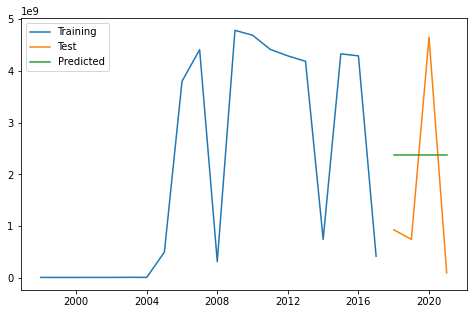

In [60]:
# Plotting against actual values

plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(Test_Prediction,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [61]:
# Looking at R2 score

test['predicted_values'] = Test_Prediction
r2_score(test['RyeProd'], test['predicted_values'])


/var/folders/w0/t7zkm9d12h11l_wy7wwcclsm0000gn/T/ipykernel_10098/1232547855.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_values'] = Test_Prediction


-0.18136345555902622

In [62]:
# The R2 score of the model trained here is -0.18 which is bad.
# If the value of the r squared score is 1, it means that the model is perfect and if its value is 0,
# it means that the model will perform badly on an unseen dataset.

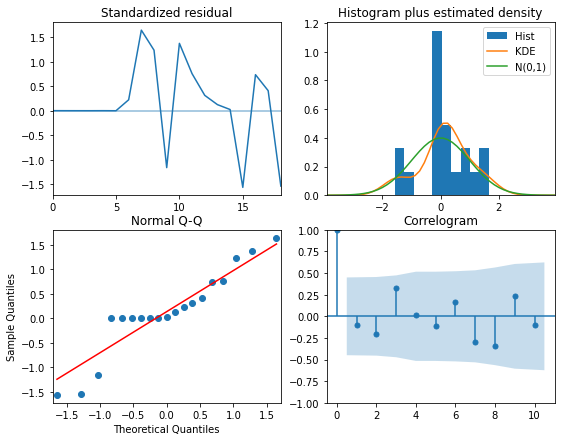

In [63]:
# Interpreting residual plots

Arima_Model.plot_diagnostics(figsize=(9,7))
plt.show()

In [64]:
# We can see in
# 1. Standardized residual Plot on top left corner, the mean is centered at 0, and the variance looks pretty equal.
# 2. Histogram and Density Plot on top right, the assumption is normally distributed and so is our actual density line
# 3. Sample quartiles on bottom left, the points are lying pretty much on the line except for a few.
# 4. In Coreelogram, at bottom right, all the point sfall in 95% confidence limit except for one; which a good sign.
# So we can say ARIMA model with p=0,d=1,q=1 is a good model for prediction.

In [65]:
# Creating new dataframe for future forecasting

Future_Forecast_Data = {'Year':  [2022, 2023, 2024, 2025],
        'predicted_values': ['NaN', 'NaN', 'NaN', 'NaN']}

Future_Forecast_Data = pd.DataFrame(Future_Forecast_Data)

print (Future_Forecast_Data)

   Year predicted_values
0  2022              NaN
1  2023              NaN
2  2024              NaN
3  2025              NaN


In [66]:
# Setting Year to date datatype 

Future_Forecast_Data['Year'] = pd.to_datetime(Future_Forecast_Data['Year'], format='%Y')

In [67]:
## Setting Year as index
Future_Forecast_Data.set_index('Year', inplace=True)

In [69]:
# Appending Future DF to Rye DF

FuturePredictionDS = Rye_Prod.append(Future_Forecast_Data)
FuturePredictionDS

/var/folders/w0/t7zkm9d12h11l_wy7wwcclsm0000gn/T/ipykernel_10098/1865163033.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FuturePredictionDS = Rye_Prod.append(Future_Forecast_Data)


,RyeProd,predicted_values
Year,,
1998-01-01,8.758000e+06,NaN
1999-01-01,8.596000e+06,NaN
2000-01-01,8.691000e+06,NaN
2001-01-01,8.929000e+06,NaN
2002-01-01,9.056000e+06,NaN
2003-01-01,1.100100e+07,NaN
2004-01-01,9.392000e+06,NaN
2005-01-01,4.966840e+08,NaN
2006-01-01,3.797778e+09,NaN


In [70]:
# Setting number of points to forecast

no_of_years = 28

# Generating forecast

Forecast2 = pd.DataFrame(Arima_Model.predict(no_of_years), index = FuturePredictionDS.index)
Forecast2.columns = ['predicted_values']
Forecast2

,predicted_values
Year,
1998-01-01,2.365160e+09
1999-01-01,2.365160e+09
2000-01-01,2.365160e+09
2001-01-01,2.365160e+09
2002-01-01,2.365160e+09
2003-01-01,2.365160e+09
2004-01-01,2.365160e+09
2005-01-01,2.365160e+09
2006-01-01,2.365160e+09


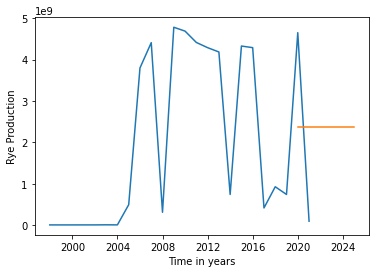

In [71]:
# Plot the Forcasted Data on graph


F_P_agn = Forecast2[-6:] # Picking the last 6 years of data from Predicted Values Dataframe(Forecast 2).

Test_Prediction1 = pd.DataFrame(Arima_Model.predict(n_periods = 6), index = F_P_agn.index)
Test_Prediction1.columns = ['predicted_values']


F2_train = Rye_Prod[:24] # Picking data for first 24 years from our original train model.


plt.plot(F2_train)
plt.plot(Test_Prediction1)  # Picking the last 6 years of data from Predicted Values Dataframe(Test_Prediction1).


# Set axis labels

plt.xlabel('Time in years')
plt.ylabel('Rye Production')

plt.show()

In [72]:
# So here we can see, in original data the production of Rye is a little higher 
# than the predicted values for the same year.

In [73]:
# 2023 Honey Prediction Values based on Rye Commodity Forecasting, 

## Using Rye ~ Honey linear regression equation performed in DataExploration_GrainsvsHoneyTime :
# y = 2.238(honey) + 30357.011

# US Rye production for 2023 is forecasted at 2.365160e+07, or 2365160 Metric Tons

# 2365160 = 2.238(Honey) + 30357.011

# 1,042,322.76 = 2023 MT Honey Prediction based on Rye Forecasting

# Based on ARIMA forecasting of highly correlated commodity Rye(with honey) and their linear relationship;
# The production of Honey looks promising.